In [3]:
data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

Exercise 1: Exploring Text Preprocessing Usage, NER And POS Tags

1. Create a function preprocess_text() wich will receive the data as argument and:

convert all the text in lower case and tokanize it
remove punctuation
remove stopwords
apply a lemmatizer
return the preprocessed strings

In [13]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag

# Téléchargements nécessaires une seule fois
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [5]:
def preprocess_text(data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    preprocessed_reviews = []

    for line in data['Review']:
        # Lowercase
        lowercase_line = line.lower()

        # Tokenize
        tokens = word_tokenize(lowercase_line)

        # Remove punctuation and stopwords, lemmatize
        cleaned_tokens = []
        for token in tokens:
            if token not in string.punctuation and token not in stop_words:
                lemma = lemmatizer.lemmatize(token)
                cleaned_tokens.append(lemma)

        # Join back to string (or keep as list if you prefer)
        preprocessed_reviews.append(' '.join(cleaned_tokens))

    return preprocessed_reviews




2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data

In [6]:
preprocessed_data = preprocess_text(data)
print(preprocessed_data)

["mcdonald 's food ok service bad", 'would recommend japanese restaurant anyone', 'loved restaurant traveled thailand last summer', 'menu loving wide variety option', "staff friendly helpful google 's employee restaurant", 'ambiance bella italia amazing pasta dish delicious', 'terrible experience pizza hut pizza burnt service slow', 'sushi sushi express always fresh flavorful', 'steakhouse main street cozy atmosphere excellent steak', 'dessert selection sweet treat die']


3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)

In [7]:
import spacy

# Charge le modèle anglais de spaCy
nlp = spacy.load('en_core_web_sm')

def perform_ner(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method

In [8]:
def perform_pos_tagging(text):
    """
    Perform Part-Of-Speech (POS) tagging on input text.

    Args:
        text (str): The input text to analyze.

    Returns:
        list of tuples: Each tuple contains (token, POS_tag)
    """
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:

In [9]:
print("=== Prétraité ===")
for review in preprocessed_data:
    print("Review:", review)
    print("NER:", perform_ner(review))
    print("POS:", perform_pos_tagging(review))
    print()

print("=== Brut ===")
# 2) Analyser les données brutes
for review in data['Review']:
    print("Review:", review)
    print("NER:", perform_ner(review))
    print("POS:", perform_pos_tagging(review))
    print()

=== Prétraité ===
Review: mcdonald 's food ok service bad
NER: [("mcdonald 's food ok service", 'ORG')]
POS: [('mcdonald', 'NN'), ("'s", 'POS'), ('food', 'NN'), ('ok', 'JJ'), ('service', 'NN'), ('bad', 'JJ')]

Review: would recommend japanese restaurant anyone
NER: [('japanese', 'NORP')]
POS: [('would', 'MD'), ('recommend', 'VB'), ('japanese', 'JJ'), ('restaurant', 'NN'), ('anyone', 'NN')]

Review: loved restaurant traveled thailand last summer
NER: [('thailand', 'GPE'), ('last summer', 'DATE')]
POS: [('loved', 'VBN'), ('restaurant', 'NN'), ('traveled', 'VBN'), ('thailand', 'NN'), ('last', 'JJ'), ('summer', 'NN')]

Review: menu loving wide variety option
NER: []
POS: [('menu', 'NN'), ('loving', 'VBG'), ('wide', 'JJ'), ('variety', 'NN'), ('option', 'NN')]

Review: staff friendly helpful google 's employee restaurant
NER: [('google', 'ORG')]
POS: [('staff', 'NN'), ('friendly', 'RB'), ('helpful', 'JJ'), ('google', 'NN'), ("'s", 'POS'), ('employee', 'NN'), ('restaurant', 'NN')]

Review: am

Exercise 2: Plotting The Word Embeddings

1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?

In [1]:
!pip install gensim

In [10]:
# Tokenize chaque phrase (split par défaut OK ici)
tokenized_reviews = [review.split() for review in preprocessed_data]

import gensim
from gensim.models import Word2Vec

# Créer le modèle
model = Word2Vec(
    sentences=tokenized_reviews,  # liste de listes
    vector_size=100,              # dimension du vecteur
    window=5,                     # contexte
    min_count=1,                  # fréquence min pour inclure un mot
    workers=4,                    # threads CPU
    sg=1                          # 1=skip-gram, 0=CBOW
)

print("Taille du vocabulaire :", len(model.wv.index_to_key))
print("Dimension du vecteur :", model.vector_size)


Taille du vocabulaire : 56
Dimension du vecteur : 100


2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
Finally call this function to see the plots and analyse it:

Are the related words close to each other?
What can be the possible reasons for this output?

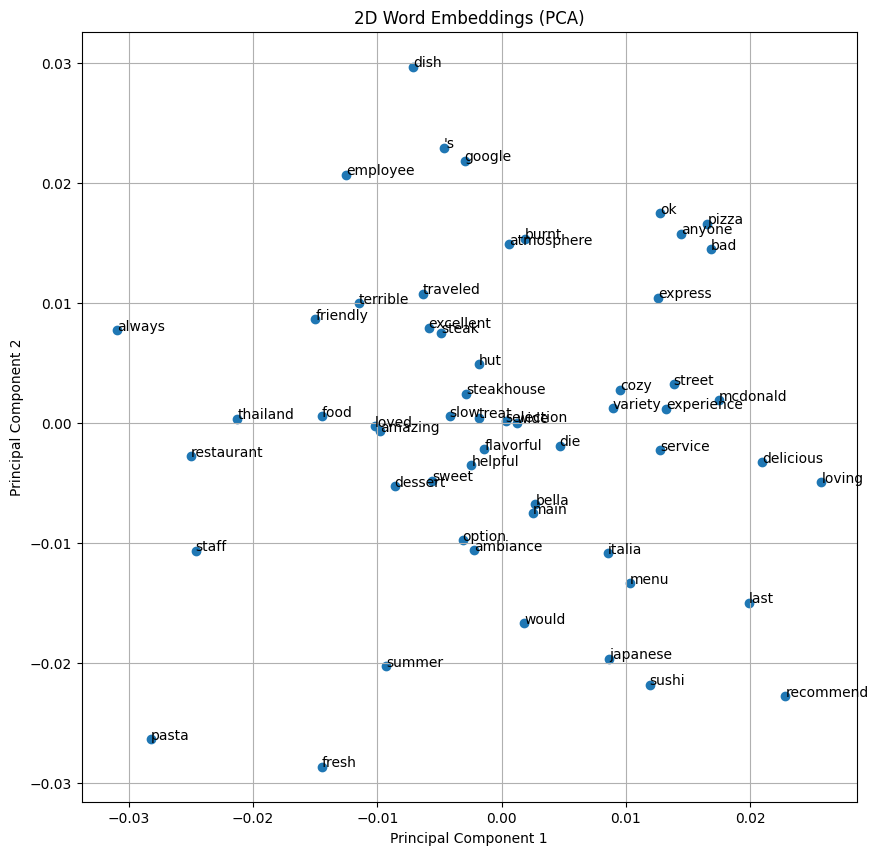

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(word2vec_model):
    """
    Reduce the word vectors to 2D using PCA and plot them with annotations.

    Args:
        word2vec_model (Word2Vec): Trained gensim Word2Vec model.
    """
    # Récupérer tous les mots et vecteurs
    words = list(word2vec_model.wv.index_to_key)
    word_vectors = word2vec_model.wv[words]

    # Réduction de dimension à 2D (PCA)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(10, 10))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

    plt.title("2D Word Embeddings (PCA)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

# Suppose que tu as ton modèle Word2Vec
plot_word_embeddings(model)


Le jeu de données est petit ➜ pas assez de contexte pour bien apprendre les relations.
Les hyperparamètres du modèle (window, vector_size) peuvent aussi influencer.
Le prétraitement (lemmatisation, stopwords) peut retirer trop d’informations.

3. To enhance the analysis, you can:

Experiment with different preprocessing techniques.
Fine-tune the Word2Vec model parameters.
Explore advanced visualization techniques for word embeddings.

In [15]:
from nltk import bigrams

def preprocess_text(data):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    preprocessed_reviews = []

    for line in data['Review']:
        # Lowercase
        lowercase_line = line.lower()

        # Tokenize
        tokens = word_tokenize(lowercase_line)

        # Remove punctuation and stopwords, lemmatize
        cleaned_tokens = []
        for token in tokens:
            if token not in string.punctuation and token not in stop_words:
                stem = stemmer.stem(token)
                cleaned_tokens.append(stem)

        # Join back to string (or keep as list if you prefer)
        preprocessed_reviews.append(' '.join(cleaned_tokens))

    return preprocessed_reviews

def generate_bigrams(tokenized_reviews):
    bigram_reviews = []
    for tokens in tokenized_reviews:
        bigram_tokens = list(bigrams(tokens))
        # Fusionne unigrams et bigrams
        bigram_tokens = ['_'.join(b) for b in bigram_tokens]
        bigram_reviews.append(tokens + bigram_tokens)
    return bigram_reviews

In [16]:
tokenized_reviews = [review.split() for review in preprocess_text(data)]
tokenized_reviews = generate_bigrams(tokenized_reviews)

In [17]:
# Plus de contexte, plus grande dimension
model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=150,
    window=8,
    sg=1,
    min_count=1,
    workers=4
)

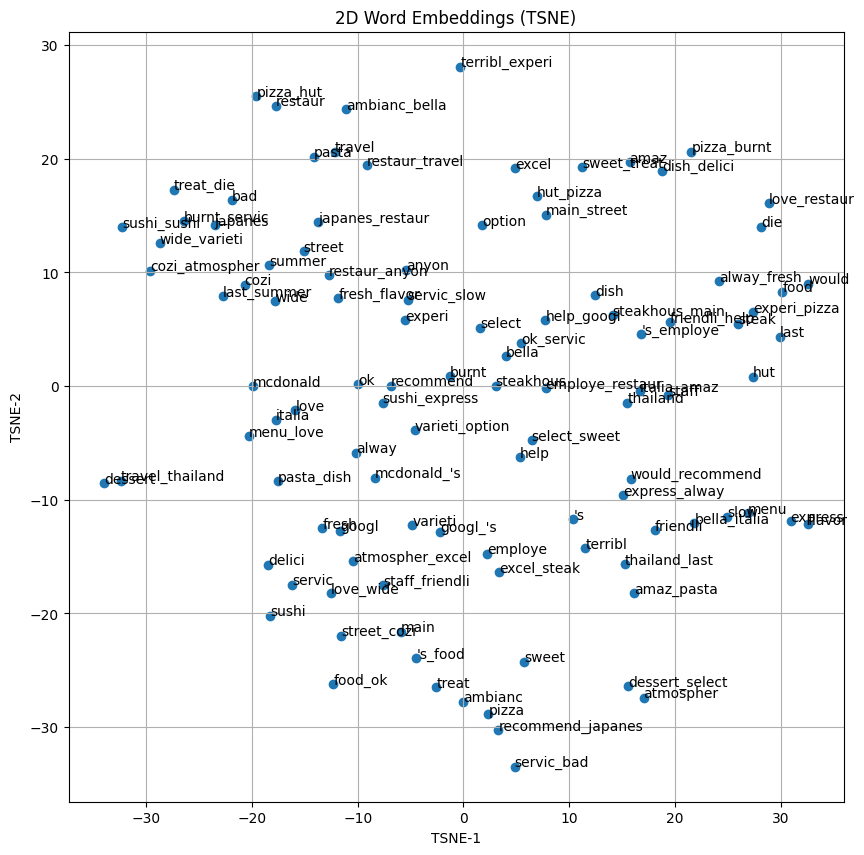

In [19]:
from sklearn.manifold import TSNE

def plot_word_embeddings_tsne(word2vec_model):
    words = list(word2vec_model.wv.index_to_key)
    word_vectors = word2vec_model.wv[words]

    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    X_tsne = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))

    plt.title("2D Word Embeddings (TSNE)")
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.grid(True)
    plt.show()

# Suppose que tu as ton modèle Word2Vec
plot_word_embeddings_tsne(model)
